In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

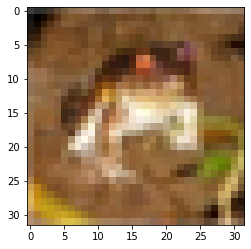

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu",kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_Stop = EarlyStopping(monitor = "val_loss",patience=2)

In [14]:
model_history = model.fit(X_train,y_cat_train,epochs=15,callbacks=[early_Stop],validation_data=(X_test,y_cat_test))

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4596 - accuracy: 0.4745 - val_loss: 1.2352 - val_accuracy: 0.5608
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1218 - accuracy: 0.6066 - val_loss: 1.0878 - val_accuracy: 0.6163
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9654 - accuracy: 0.6623 - val_loss: 1.0038 - val_accuracy: 0.6518
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8452 - accuracy: 0.7036 - val_loss: 0.9465 - val_accuracy: 0.6748
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7480 - accuracy: 0.7376 - val_loss: 0.9729 - val_accuracy: 0.6740
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6618 - accuracy: 0.7680 - val_loss: 0.9788 - val_accuracy: 0.6805


In [15]:
losses = pd.DataFrame(model_history.history)

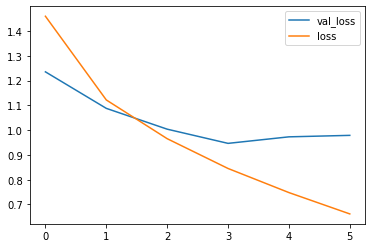

In [16]:
losses[["val_loss","loss"]].plot()

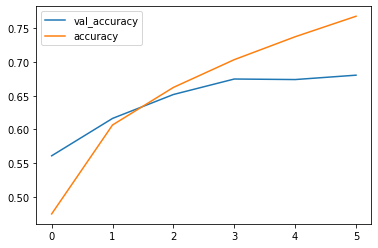

In [17]:
losses[["val_accuracy","accuracy"]].plot()

In [18]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.80      0.78      0.79      1000
           2       0.56      0.59      0.58      1000
           3       0.50      0.51      0.50      1000
           4       0.64      0.58      0.61      1000
           5       0.59      0.59      0.59      1000
           6       0.71      0.79      0.75      1000
           7       0.76      0.74      0.75      1000
           8       0.79      0.76      0.77      1000
           9       0.76      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg    